# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | evensk
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | marquette
Processing Record 5 of Set 1 | pitimbu
Processing Record 6 of Set 1 | ransang
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | mahon
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | yarmouth
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | tecoanapa
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | primorka
Processing Record 22 of Set 1 | amderma
City not found. Skipping...
Processing Record 23 of Set

Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | safaga
Processing Record 42 of Set 4 | muros
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | surgut
Processing Record 45 of Set 4 | eureka
Processing Record 46 of Set 4 | tapaua
City not found. Skipping...
Processing Record 47 of Set 4 | wamba
Processing Record 48 of Set 4 | sorvag
City not found. Skipping...
Processing Record 49 of Set 4 | vestmannaeyjar
Processing Record 0 of Set 5 | kieta
Processing Record 1 of Set 5 | dakar
Processing Record 2 of Set 5 | sholapur
Processing Record 3 of Set 5 | san quintin
Processing Record 4 of Set 5 | kuhdasht
Processing Record 5 of Set 5 | mandiana
Processing Record 6 of Set 5 | bondo
Processing Record 7 of Set 5 | mnogovershinnyy
Processing Record 8 of Set 5 | yingzhong
City not found. Skipping...
Processing Record 9 of Set 5 | arlit
Processing Record 10 of Set 5 | fayaoue
Processing Record 11 of Set 5 | bodh gaya
Process

Processing Record 29 of Set 8 | punta alta
Processing Record 30 of Set 8 | tolaga bay
Processing Record 31 of Set 8 | talara
Processing Record 32 of Set 8 | kapit
Processing Record 33 of Set 8 | flin flon
Processing Record 34 of Set 8 | tarata
Processing Record 35 of Set 8 | pochutla
Processing Record 36 of Set 8 | fez
Processing Record 37 of Set 8 | thornbury
Processing Record 38 of Set 8 | gayeri
Processing Record 39 of Set 8 | kariba
Processing Record 40 of Set 8 | bawku
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | bakchar
Processing Record 43 of Set 8 | kuopio
Processing Record 44 of Set 8 | arys
Processing Record 45 of Set 8 | nome
Processing Record 46 of Set 8 | bejar
Processing Record 47 of Set 8 | camalu
Processing Record 48 of Set 8 | kungalv
Processing Record 49 of Set 8 | chuy
Processing Record 0 of Set 9 | lebu
Processing Record 1 of Set 9 | brae
Processing Record 2 of Set 9 | swan river
Processing Record 3 of Set 9 | wanning
Processing Record 4 of

Processing Record 15 of Set 12 | kajaani
Processing Record 16 of Set 12 | maroua
Processing Record 17 of Set 12 | sihora
Processing Record 18 of Set 12 | zhangjiakou
Processing Record 19 of Set 12 | pingliang
Processing Record 20 of Set 12 | verkhnetulomskiy
Processing Record 21 of Set 12 | barbar
City not found. Skipping...
Processing Record 22 of Set 12 | kindu
Processing Record 23 of Set 12 | oranjemund
Processing Record 24 of Set 12 | martapura
Processing Record 25 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 26 of Set 12 | muscatine
Processing Record 27 of Set 12 | bay roberts
Processing Record 28 of Set 12 | kaohsiung
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | kruisfontein
Processing Record 31 of Set 12 | gogrial
Processing Record 32 of Set 12 | manadhoo
Processing Record 33 of Set 12 | morros
Processing Record 34 of Set 12 | pozo colorado
Processing Record 35 of Set 12 | shelburne
Processing Record 36 of Set 12 | dawson creek


In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,25.92,83,75,3.60,BR,1674858476
1,evensk,61.9500,159.2333,-16.40,76,92,8.91,RU,1674858553
2,thompson,55.7435,-97.8558,-25.91,64,20,4.12,CA,1674858553
3,marquette,46.5333,-87.6335,-4.81,82,100,5.36,US,1674858554
4,pitimbu,-7.4706,-34.8086,27.33,74,5,4.71,BR,1674858555


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,25.92,83,75,3.60,BR,1674858476
1,evensk,61.9500,159.2333,-16.40,76,92,8.91,RU,1674858553
2,thompson,55.7435,-97.8558,-25.91,64,20,4.12,CA,1674858553
3,marquette,46.5333,-87.6335,-4.81,82,100,5.36,US,1674858554
4,pitimbu,-7.4706,-34.8086,27.33,74,5,4.71,BR,1674858555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

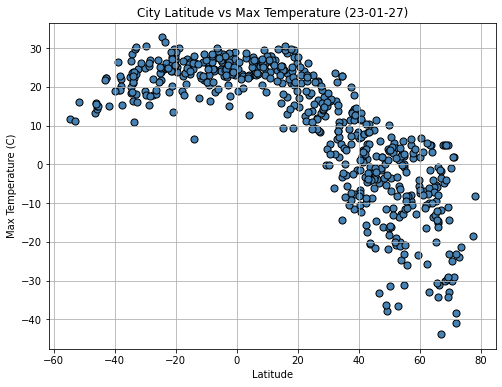

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

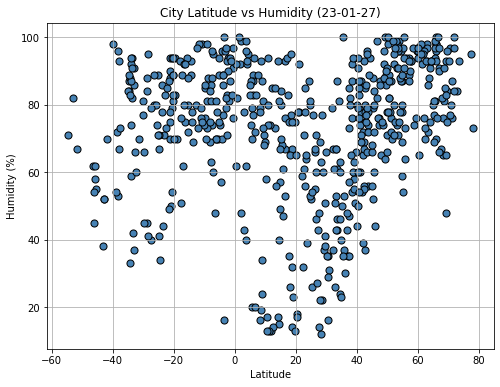

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

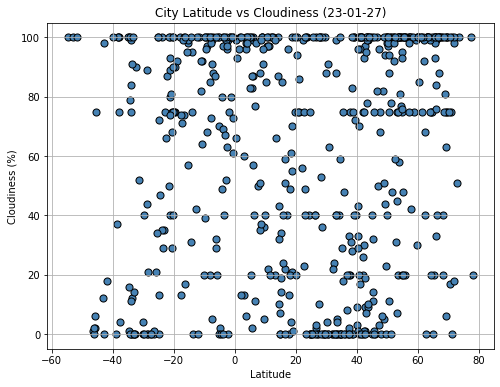

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

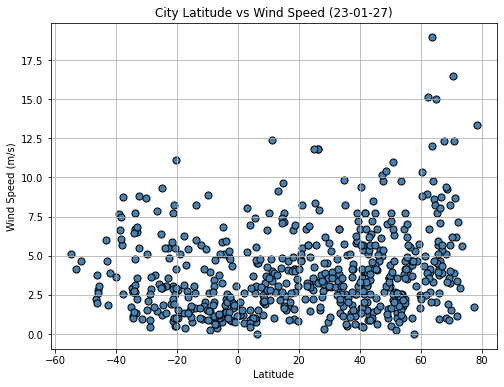

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def regressions(x_values, y_values, y_label, eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (eq_x,eq_y), fontsize=16, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"the r-value is: {rvalue}")
    plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,evensk,61.9500,159.2333,-16.40,76,92,8.91,RU,1674858553
2,thompson,55.7435,-97.8558,-25.91,64,20,4.12,CA,1674858553
3,marquette,46.5333,-87.6335,-4.81,82,100,5.36,US,1674858554
5,ransang,8.9603,117.5828,25.48,87,100,2.66,PH,1674858555
9,mahon,39.8885,4.2658,8.31,66,40,6.69,ES,1674858459


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,25.92,83,75,3.60,BR,1674858476
4,pitimbu,-7.4706,-34.8086,27.33,74,5,4.71,BR,1674858555
6,saldanha,-33.0117,17.9442,18.03,91,0,6.52,ZA,1674858556
7,vaini,-21.2000,-175.2000,24.09,94,100,3.09,TO,1674858557
8,isangel,-19.5500,169.2667,25.06,94,75,1.03,VU,1674858557


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.8165100521285226


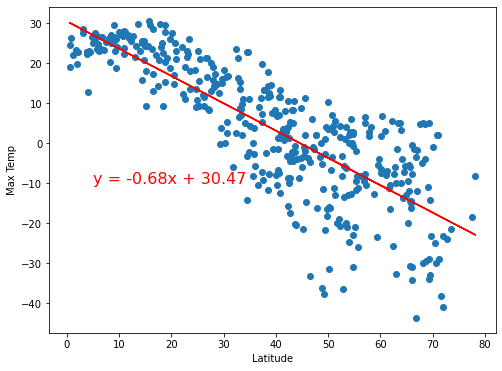

In [86]:
# Linear regression on Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", 5,-10)

the r-value is: 0.44199153003498043


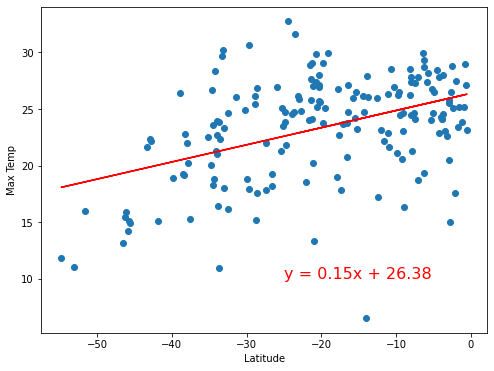

In [88]:
# Linear regression on Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", -25,10)

**Discussion about the linear relationship:** The northern hemisphere has a very strong negative correlation between latitude and max temperature, while the southern hemisphere has a moderate positive correlation between latitude and max temperature. 

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.3975583523224658


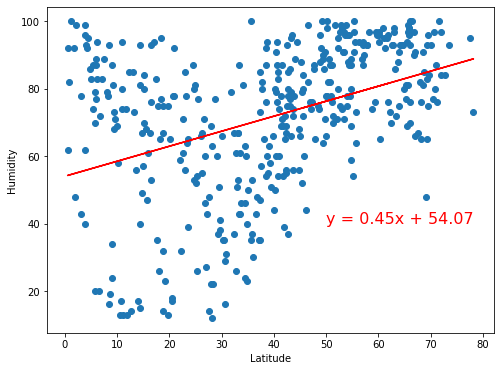

In [90]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", 50,40)

the r-value is: 0.3098079728951691


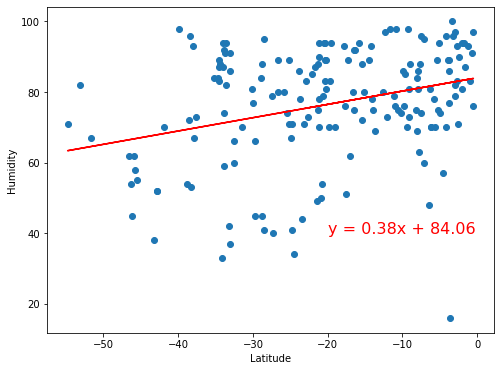

In [92]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", -20, 40)

**Discussion about the linear relationship:** In both the Northern and Southern hemispheres there is a weak positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.16190864922743886


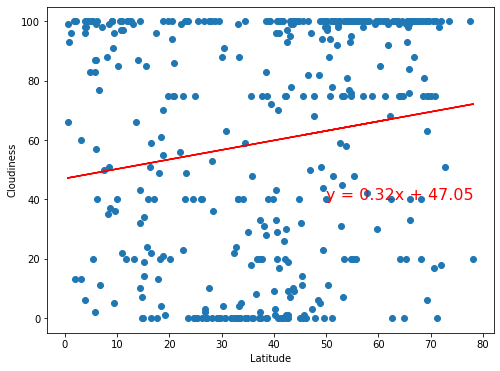

In [93]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", 50,40)

the r-value is: 0.28278187951334766


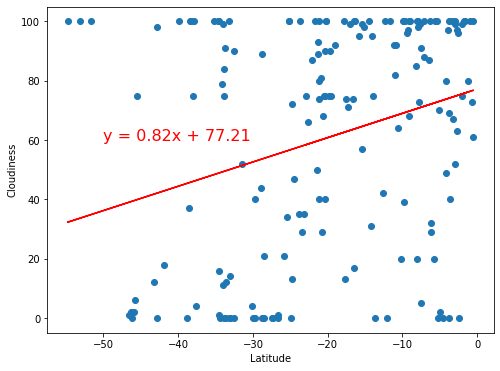

In [95]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", -50,60)

**Discussion about the linear relationship:** The Nothern hemisphere has a very weak positive correlation between latitude and cloudiness, while the southern hemisphere has a weak positive correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.21799928219320525


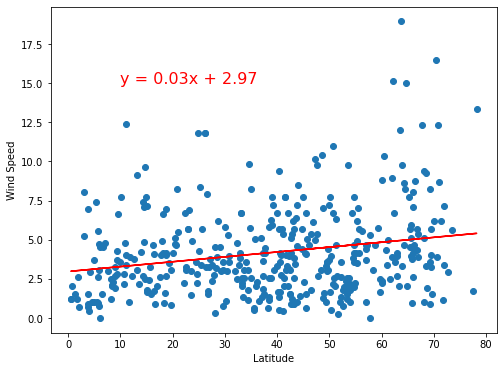

In [97]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", 10,15)

the r-value is: -0.2699155055687524


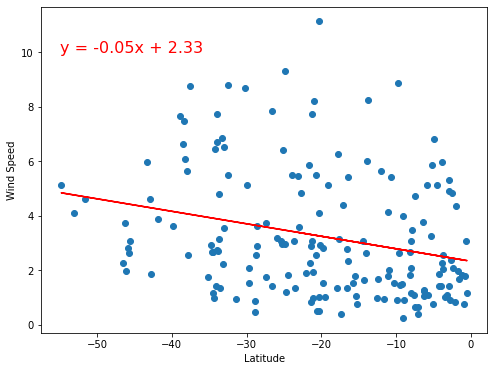

In [99]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", -55,10)

**Discussion about the linear relationship:** The northern hemisphere has a weak positive correlation between latitude and wind speed and the southern hemisphere has a weak negative correlation between latitude and wind speed.